# Task 1
###  Develop a classifier to differentiate between natural and human fire causes, so a binary classifcation. Part a aims at finding the best classifier you can, part b at finding a classifier that also works well, but is interpretable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## CLASSIFICATION PACKAGES ##
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

### First we'll try some predictions with region as a variable within the classifier

In [2]:
df = pd.read_csv('task3df.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)

X = df[[
    'fm.mean', 'Wind.mean', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY',
    'FIRE_YEAR', 'cont_time', 'PROJECTED_FINAL_IM_COST', 'ACRES',
    'TOTAL_PERSONNEL', 'STR_DAMAGED', 'WF_FSR', 'FATALITIES', 'FIRE_SIZE',
    'eco1_10  NORTH AMERICAN DESERTS', 'eco1_11  MEDITERRANEAN CALIFORNIA',
    'eco1_12  SOUTHERN SEMIARID HIGHLANDS', 'eco1_13  TEMPERATE SIERRAS',
    'eco1_15  TROPICAL WET FORESTS', 'eco1_2  TUNDRA', 'eco1_3  TAIGA',
    'eco1_5  NORTHERN FORESTS', 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS',
    'eco1_7  MARINE WEST COAST FOREST', 'eco1_8  EASTERN TEMPERATE FORESTS',
    'eco1_9  GREAT PLAINS', 'FUEL_MODEL_Brush (2 feet)',
    'FUEL_MODEL_Chaparral (6 feet)', 'FUEL_MODEL_Closed Timber Litter',
    'FUEL_MODEL_Dormant Brush, Hardwood Slash',
    'FUEL_MODEL_Hardwood Litter', 'FUEL_MODEL_Heavy Logging Slash',
    'FUEL_MODEL_Light Logging Slash', 'FUEL_MODEL_Medium Logging Slash',
    'FUEL_MODEL_Short Grass (1 foot)', 'FUEL_MODEL_Southern Rough',
    'FUEL_MODEL_Tall Grass (2.5 feet)',
    'FUEL_MODEL_Timber (Grass and Understory)',
    'FUEL_MODEL_Timber (Litter and Understory)', 'GROWTH_POTENTIAL_Extreme',
    'GROWTH_POTENTIAL_High', 'GROWTH_POTENTIAL_Low',
    'GROWTH_POTENTIAL_Medium', 'TERRAIN_Extreme', 'TERRAIN_High',
    'TERRAIN_Low', 'TERRAIN_Medium', 'FIRE_SIZE_CLASS_A',
    'FIRE_SIZE_CLASS_B', 'FIRE_SIZE_CLASS_C', 'FIRE_SIZE_CLASS_D',
    'FIRE_SIZE_CLASS_E', 'FIRE_SIZE_CLASS_F', 'FIRE_SIZE_CLASS_G'
    ]].copy()

# 1 = caused by lightning
# 0 = caused by humans
y = df[['STAT_CAUSE_DESCR_Lightning']].copy()

In [3]:
y.sum() / y.shape[0]

STAT_CAUSE_DESCR_Lightning    0.797885
dtype: float64

## Part (a) - No Interpretation

In [4]:
def per_class_acc(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    per_class_acc = cm.diagonal()
    
    return per_class_acc[0], per_class_acc[1]
    

# Scale continuous variables
scaler = StandardScaler()
X.loc[:,X.columns[0:14]] = scaler.fit_transform(X[(X.columns[0:14])])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

print("\n=== AdaBoost ===")
abc = AdaBoostClassifier().fit(X_train, y_train.values.ravel())
y_pred = abc.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {abc.score(X_test, y_test)}")

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {rf.score(X_test, y_test)}")

print("\n=== Logistic Regression ===")
lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {knn.score(X_test, y_test)}")

print("\n=== Support Vector Classifier ===")
svm = LinearSVC().fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {svm.score(X_test, y_test)}")

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {dtc.score(X_test, y_test)}")


=== AdaBoost ===
Per class acc: (0.5747914183551848, 0.9632515066882258)
Total acc: 0.8863931140195732

=== Random Forest ===
Per class acc: (0.9848033373063171, 0.9977950904012935)
Total acc: 0.9952246197382384

=== Logistic Regression ===
Per class acc: (0.5122169249106079, 0.9521534617080699)
Total acc: 0.8651102464332037

=== K Nearest Neighbours ===
Per class acc: (0.9091179976162098, 0.9874320152873732)
Total acc: 0.9719372715481664

=== Support Vector Classifier ===


/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Per class acc: (0.5050655542312277, 0.9563427899456123)
Total acc: 0.8670557717250325

=== Decision Tree Classifier ===
Per class acc: (0.9851013110846245, 0.9963251506688225)
Total acc: 0.99410446881264


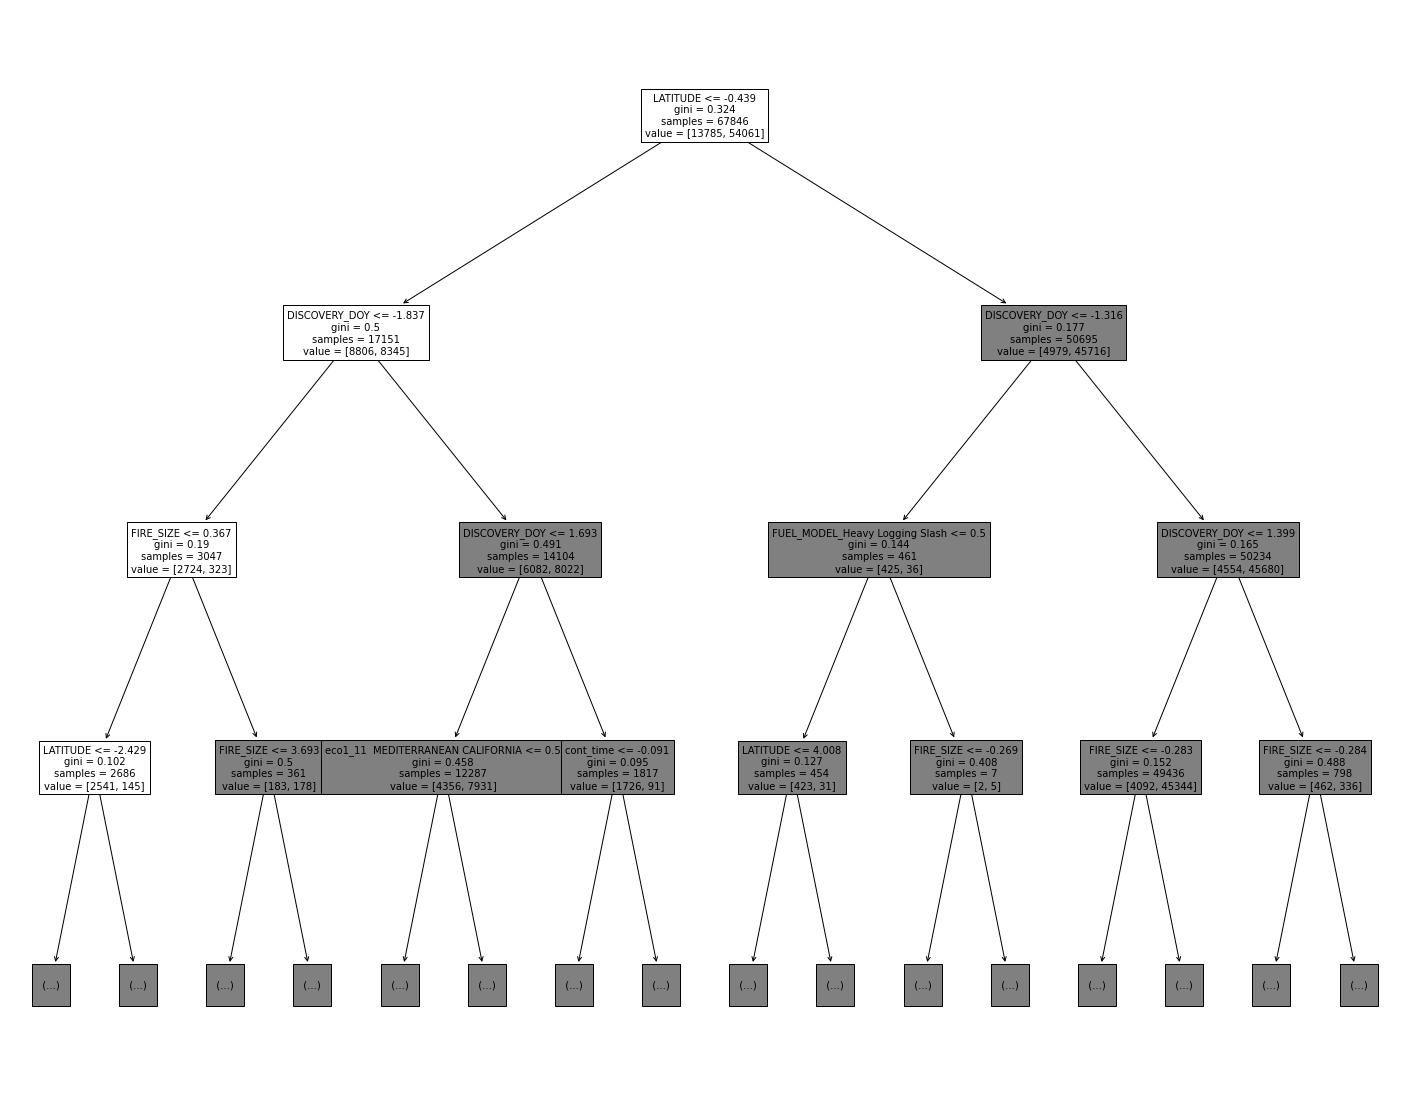

In [7]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, max_depth=3, feature_names=X.columns, fontsize=10)
